In [32]:
import json
import os

def calculate_accuracy(json_file_path):
    """计算单个JSON文件的准确率"""
    total = 0
    correct = 0

    with open(json_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)  # 逐行解析JSON
                if data['prob']["A"] == 0.25:
                    continue
                total += 1
                if data['prediction'] == data['true_label']:
                    correct += 1
            except json.JSONDecodeError as e:
                print(f"JSONDecodeError: {e} in line {line}")
                continue  # 跳过解析错误的行


    accuracy = correct / total if total > 0 else 0
    return accuracy, total, correct

def process_directory(directory_path):
    """处理文件夹中的每个 normal_dataset.json 文件并计算准确率"""
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file == "normal_dataset.json":
                file_path = os.path.join(root, file)
                accuracy, total, correct = calculate_accuracy(file_path)
                print(f"文件: {file_path}\n总样本: {total}, 正确样本: {correct}, 准确率: {accuracy:.2%}")

# 调用函数处理文件夹
directory_path = "./withsample_normaloutput"  # 根据你的文件路径调整
process_directory(directory_path)


文件: ./withsample_normaloutput/llama3_1_8_ft_super_tiny_test/normal_dataset.json
总样本: 9, 正确样本: 1, 准确率: 11.11%
文件: ./withsample_normaloutput/Meta-Llama-3-8B/normal_dataset.json
总样本: 11, 正确样本: 2, 准确率: 18.18%
文件: ./withsample_normaloutput/Mistral-7B-Instruct-v0.1/normal_dataset.json
总样本: 86, 正确样本: 19, 准确率: 22.09%
文件: ./withsample_normaloutput/Meta-Llama-3.1-8B/normal_dataset.json
总样本: 7, 正确样本: 2, 准确率: 28.57%
文件: ./withsample_normaloutput/Mistral-7B-v0.1/normal_dataset.json
总样本: 41, 正确样本: 12, 准确率: 29.27%
文件: ./withsample_normaloutput/llama3-instruct-ft/normal_dataset.json
总样本: 83, 正确样本: 24, 准确率: 28.92%
文件: ./withsample_normaloutput/saved_models_llama3_1_8_test/normal_dataset.json
总样本: 17, 正确样本: 7, 准确率: 41.18%
文件: ./withsample_normaloutput/Meta-Llama-3.1-8B-Instruct/normal_dataset.json
总样本: 75, 正确样本: 28, 准确率: 37.33%
文件: ./withsample_normaloutput/saved_models_llama3_8_test/normal_dataset.json
总样本: 92, 正确样本: 23, 准确率: 25.00%
文件: ./withsample_normaloutput/saved_models_deepseek_8_test/normal_data

In [25]:
import sys
print(sys.executable)
!pip install matplotlib


/home/haochuntang/miniconda3/envs/finger/bin/python


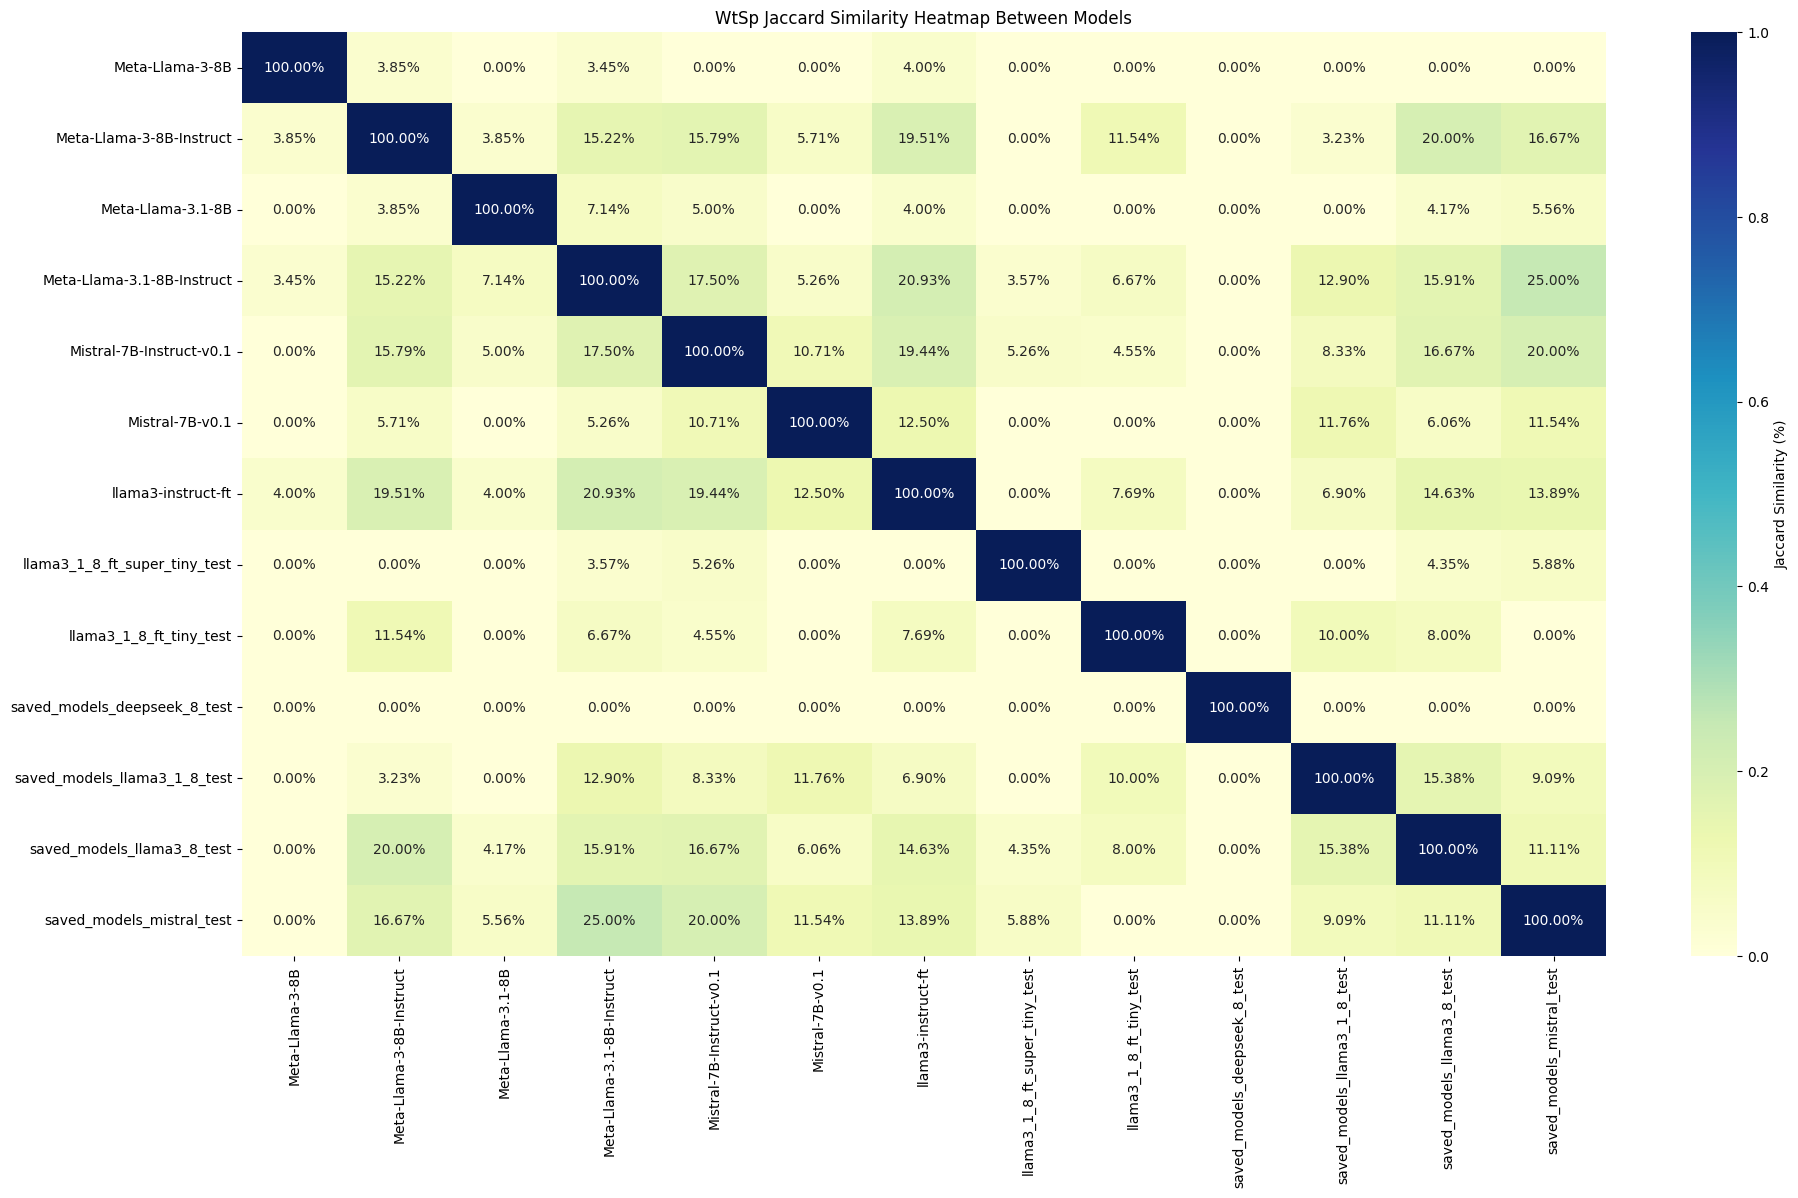

In [45]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def calculate_correct_indices(json_file_path):
    """计算单个JSON文件的正确回答编号"""
    correct_indices = []
    with open(json_file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            try:
                data = json.loads(line)
                if data['prob']["A"] == 0.25:
                    continue
                if data['prediction'] == data['true_label']:
                    correct_indices.append(i)  # 保存正确回答的编号
            except json.JSONDecodeError as e:
                print(f"JSONDecodeError: {e} in line {line}")
                continue
    return correct_indices

def jaccard_similarity(list1, list2):
    """计算两个列表之间的 Jaccard 相似度"""
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

def process_directory(directory_path):
    """处理文件夹中的每个 normal_dataset.json 文件并计算 Jaccard 相似度"""
    datasets = {}
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file == "normal_dataset.json":
                file_path = os.path.join(root, file)
                dataset_name = os.path.basename(root)
                correct_indices = calculate_correct_indices(file_path)
                datasets[dataset_name] = correct_indices

    # 对数据集名称进行字母顺序排序
    dataset_names = sorted(datasets.keys())
    similarity_matrix = pd.DataFrame(index=dataset_names, columns=dataset_names)

    # 填充 Jaccard 相似度矩阵
    for i, name1 in enumerate(dataset_names):
        for j, name2 in enumerate(dataset_names):
            if i == j:
                similarity_matrix.loc[name1, name2] = 1.0
            else:
                similarity = jaccard_similarity(datasets[name1], datasets[name2])
                similarity_matrix.loc[name1, name2] = similarity

    return similarity_matrix.astype(float)

# 处理目录并计算相似度矩阵
directory_path = "./withsample_normaloutput"  # 替换为实际路径
similarity_matrix = process_directory(directory_path)

# 绘制热力图
plt.figure(figsize=(22, 12))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", fmt=".2%", cbar_kws={'label': 'Jaccard Similarity (%)'})
plt.title('WtSp Jaccard Similarity Heatmap Between Models')
plt.savefig("WtSp Jaccard Similarity Heatmap Between Models.png")

plt.show()


# # 调用函数处理文件夹并获取结果
# directory_path = "./normaloutput"  # 根据你的文件路径调整
# acc_results = process_directory(directory_path)

# # 将文件名和准确率分离出来用于绘图
# file_names = [result[0] for result in acc_results]
# accuracies = [result[1] for result in acc_results]

# # 绘制垂直条形图
# plt.figure(figsize=(10, 6))
# plt.bar(file_names, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])

# # 添加标题和标签
# plt.ylabel('Accuracy (%)')
# plt.xlabel('Dataset')
# plt.title('Accuracy Comparison of Different Models')

# # 在每个条形上显示准确率的数值
# for index, value in enumerate(accuracies):
#     plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontweight='bold')

# # 显示图表
# plt.ylim(0, 100)  # 设置y轴的范围，最大到100%
# plt.tight_layout()
# plt.show()


模型: Mistral-7B-Instruct-v0.1
Category: semantic, 准确率: 98.91%
Category: temporal, 准确率: 97.78%
Category: misinformation, 准确率: 96.59%

模型: Meta-Llama-3.1-8B-Instruct
Category: semantic, 准确率: 95.45%
Category: temporal, 准确率: 87.32%
Category: misinformation, 准确率: 81.54%

模型: gemma-2-2b-it
Category: semantic, 准确率: 95.18%
Category: temporal, 准确率: 94.81%
Category: misinformation, 准确率: 91.67%

模型: Qwen2.5-7B
Category: semantic, 准确率: 91.94%
Category: temporal, 准确率: 95.00%
Category: misinformation, 准确率: 92.31%



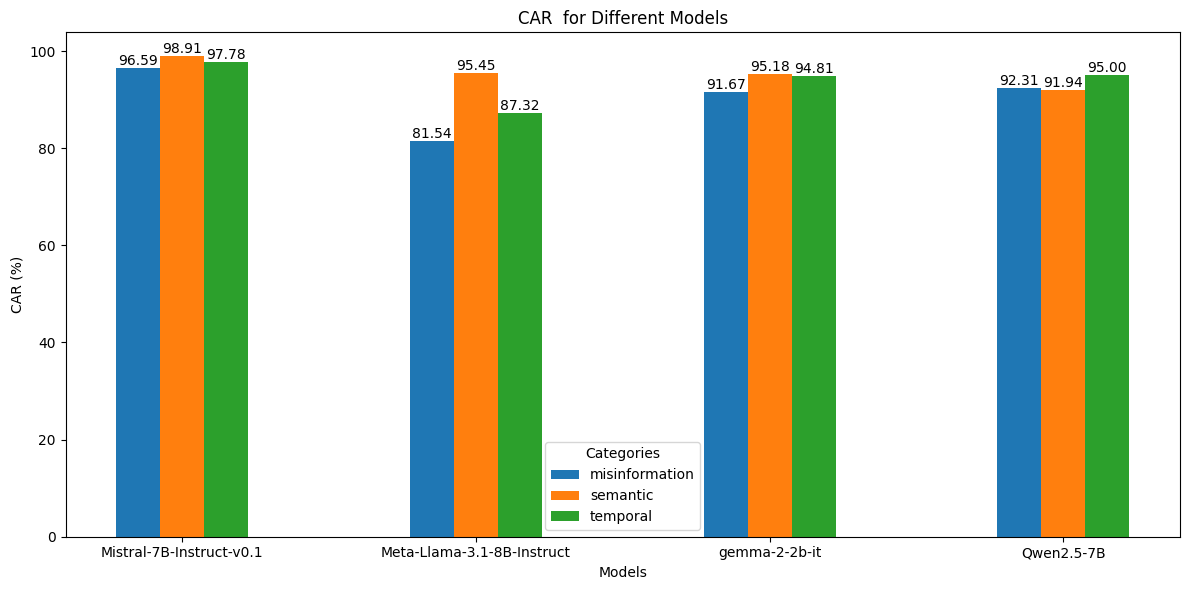

<Figure size 640x480 with 0 Axes>

In [28]:
import json
import os
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_accuracy_by_category(json_file_path):
    """计算每个 category 的准确率"""
    category_totals = defaultdict(int)
    category_corrects = defaultdict(int)

    with open(json_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)  # 逐行解析JSON
                category = data.get('category', 'Unknown')  # 获取 category 属性
                if data['prob']["A"] == 0.25:
                    continue
                category_totals[category] += 1
                if data['prediction'] == data['replaced_label']:
                    category_corrects[category] += 1
            except json.JSONDecodeError as e:
                print(f"JSONDecodeError: {e} in line {line}")
                continue  # 跳过解析错误的行

    # 计算每个 category 的准确率
    category_accuracies = {cat: (category_corrects[cat] / category_totals[cat]) * 100 if category_totals[cat] > 0 else 0
                           for cat in category_totals}
    
    return category_accuracies

def process_directory(directory_path):
    """处理文件夹中的每个 conflict.json 文件并计算每个 category 的准确率"""
    all_results = {}
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file == "conflict.json":
                file_path = os.path.join(root, file)
                category_accuracies = calculate_accuracy_by_category(file_path)
                dataset_name = os.path.basename(root)  # 使用文件夹名作为数据集名称
                all_results[dataset_name] = category_accuracies
                # 输出每个 category 的结果
                print(f"模型: {dataset_name}")
                for category, accuracy in category_accuracies.items():
                    print(f"Category: {category}, 准确率: {accuracy:.2f}%")
                print()
    return all_results

# 调用函数处理文件夹并获取结果
directory_path = "./conflictoutput"  # 根据你的文件路径调整
results = process_directory(directory_path)

# 获取所有可能的 categories
all_categories = set()
for model_name, data in results.items():
    all_categories.update(data.keys())

all_categories = sorted(all_categories)

# 生成一个包含所有模型和分类的分组条形图
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.15  # 每个条形图的宽度
index = range(len(results))  # X轴的位置
#

# 绘制不同分类的条形图
for idx, category in enumerate(all_categories):
    Mr = [+ results[model_name].get(category, 0) for model_name in results]
    bar_pos = [i + bar_width * idx for i in index]  # 计算每个分类在每个模型上的偏移量
    # ax.bar(bar_pos, accuracies, bar_width, label=category)
    bars = ax.bar(bar_pos, Mr, bar_width, label=category)

# 在每个条形上显示具体数值
    for bar in bars:
        yval = bar.get_height()  # 获取条形的高度
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x 轴位置
            yval,  # y 轴位置（即条形的高度）
            f'{yval:.2f}',  # 显示的文字（保留2位小数）
            ha='center', va='bottom'  # 设置文字对齐方式
        )
# 添加标题和标签
ax.set_xlabel('Models')
ax.set_ylabel('CAR (%)')
ax.set_title('CAR  for Different Models')
ax.set_xticks([i + bar_width for i in index])  # 调整X轴的位置
ax.set_xticklabels(results.keys())  # 设置X轴标签为模型名称

# 添加图例
ax.legend(title='Categories')

# 显示图表
plt.tight_layout()
plt.show()



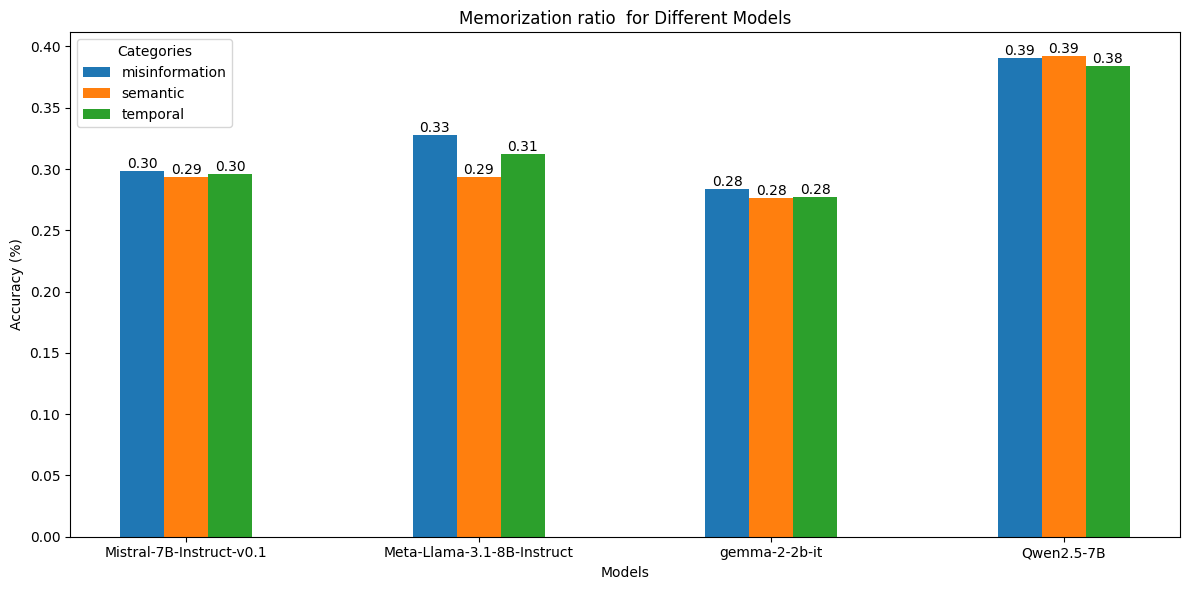

In [30]:
# 获取所有可能的 categories
all_categories = set()
for model_name, data in results.items():
    all_categories.update(data.keys())

all_categories = sorted(all_categories)

# 生成一个包含所有模型和分类的分组条形图
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.15  # 每个条形图的宽度
index = range(len(results))  # X轴的位置
# 绘制不同分类的条形图
for idx, category in enumerate(all_categories):
    Mr = [acc_set[model_name]/(acc_set[model_name]+ results[model_name].get(category, 0)) for model_name in results]
    bar_pos = [i + bar_width * idx for i in index]  # 计算每个分类在每个模型上的偏移量
    # ax.bar(bar_pos, accuracies, bar_width, label=category)
    bars = ax.bar(bar_pos, Mr, bar_width, label=category)

# 在每个条形上显示具体数值
    for bar in bars:
        yval = bar.get_height()  # 获取条形的高度
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x 轴位置
            yval,  # y 轴位置（即条形的高度）
            f'{yval:.2f}',  # 显示的文字（保留2位小数）
            ha='center', va='bottom'  # 设置文字对齐方式
        )
# 添加标题和标签
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Memorization ratio  for Different Models')
ax.set_xticks([i + bar_width for i in index])  # 调整X轴的位置
ax.set_xticklabels(results.keys())  # 设置X轴标签为模型名称

# 添加图例
ax.legend(title='Categories')

# 显示图表
plt.tight_layout()
plt.show()